# Chess Games Analysis

Author:Josh Tseng       

Course Project, UC Irvine, Math 10, S22

## Introduction

Introduce your project here.  Maybe 3 sentences.

Chess is a game about pattern recongnition and this is what machine learning is all about. In this project, we will use over 30,000 games on one of the most popular website "Lichess" to analyse the best wining strategy in a game of chess. The dataset is from kaggle, somone used a Lichess api to create it.
 [Chess Dataset](https://www.kaggle.com/datasets/datasnaek/chess)

## Data Cleaning and Feature Engineer  

In [2]:
import pandas as pd
import altair as alt
pd.set_option('mode.chained_assignment', None)

In [3]:
df = pd.read_csv('games.csv')

In [4]:
df

id  rated    created_at  last_move_at  turns victory_status  \
0      TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime   
1      l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign   
2      mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate   
3      kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate   
4      9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate   
...         ...    ...           ...           ...    ...            ...   
20053  EfqH7VVH   True  1.499791e+12  1.499791e+12     24         resign   
20054  WSJDhbPl   True  1.499698e+12  1.499699e+12     82           mate   
20055  yrAas0Kj   True  1.499698e+12  1.499698e+12     35           mate   
20056  b0v4tRyF   True  1.499696e+12  1.499697e+12    109         resign   
20057  N8G2JHGG   True  1.499643e+12  1.499644e+12     78           mate   

      winner increment_code       white_id  white_rating            black_id  \
0      white           15+2       bourgris          1500                a-00   
1      black           5+10           a-00          1322           skinnerua   
2      white           5+10         ischia          1496                a-00   
3      white           20+0  daniamurashov          1439        adivanov2009   
4      white           30+3      nik221107          1523        adivanov2009   
...      ...            ...            ...           ...                 ...   
20053  white          10+10        belcolt          1691            jamboger   
20054  black           10+0       jamboger          1233  farrukhasomiddinov   
20055  white           10+0       jamboger          1219        schaaksmurf3   
20056  white           10+0   marcodisogno          1360            jamboger   
20057  black           10+0       jamboger          1235               ffbob   

       black_rating                                              moves  \
0              1191  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...   
1              1261  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...   
2              1500  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...   
3              1454  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...   
4              1469  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...   
...             ...                                                ...   
20053          1220  d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...   
20054          1196  d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...   
20055          1286  d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...   
20056          1227  e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...   
20057          1339  d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...   

      opening_eco                            opening_name  opening_ply  
0             D10        Slav Defense: Exchange Variation            5  
1             B00  Nimzowitsch Defense: Kennedy Variation            4  
2             C20   King's Pawn Game: Leonardis Variation            3  
3             D02  Queen's Pawn Game: Zukertort Variation            3  
4             C41                        Philidor Defense            5  
...           ...                                     ...          ...  
20053         A80                           Dutch Defense            2  
20054         A41                            Queen's Pawn            2  
20055         D00         Queen's Pawn Game: Mason Attack            3  
20056         B07                            Pirc Defense            4  
20057         D00         Queen's Pawn Game: Mason Attack            3  

[20058 rows x 16 columns]

In [5]:
#checking for null value
df.isna().any().any()

False

There is no null value in the whole dataset. However, I do want to get rid of the games that has than 6 terms, since those games does not really have much meanings.  

In [6]:
df = df[df['turns']>5].copy()

### Coverting the "created_at" and "last_move_at" to Pandas Datetime

The original time was measure in something that is called unix timestamp, which is not readable for human, so I converedti into pandas datetime.

In [7]:
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

In [8]:
df['last_move_at'] = pd.to_datetime(df['last_move_at'], unit='ms')

### Creating a New Column called Format

Here I want to create some extra columns that will help the machine learning process easier and more accurate.

The 'increment_code' column is not too useful, genrally online chess games are sepereted into 3 different format, less than 3 minutes is called bullet, 3 minutes to 14 minutes is called blitz, and 15 minutes or above is called rapid, the first number before the plus sign in the 'increment_code' column indicats the minute, so I want to create a new column called 'format' and it has three values, 'bullet', 'blitz', and 'rapid'

In [9]:
df['increment_code1'] = (df['increment_code'].str.split('+',-1).str[0]).map(int)
df['format'] = 'bullet'
df.loc[(df['increment_code1'] >= 3),'format'] = 'blitz' 
df.loc[df['increment_code1'] >= 15,'format'] = 'rapid'
df.drop('increment_code1', inplace=True, axis=1)

In [10]:
(df['format']).value_counts()

blitz     13624
rapid      5937
bullet      115
Name: format, dtype: int64

### Creating New Columns for Machine Learning

Here I want to add 2 new columns that are numerical, which will help me perform linear regression. The two columns being, 'black_win'and 'white_win'. Each column will have 3 different values, 0 for lose, 0.5 for draw, and 1 for win

In [11]:
df['black_win'] = 0
df.loc[df['winner'] == 'black', 'black_win'] = 1
df.loc[df['winner'] == 'draw', 'black_win'] = 0.5
df['white_win'] = 1 - df['black_win']

### Creating New Data Frames for the Chess Library 

I want to create a new data frame that has the first 6 moves of each game and if white win or not.

In [12]:
moves = ['move ' + str(i) for i in range(1,7)]
df2 = df['opening_name']
df2 = pd.DataFrame(df2)
df2[moves] = 0
for i in df.index:
    temp = df.loc[i, 'moves'].split()
    for j in range(1,7):
        df2.loc[i, 'move ' + str(j)] = temp[j-1]

The reason I decided to store the moves column into a new data frame is because when the moves are in df, the size of it gets too big, and cannot plot some altair chart. Df2 is for the chess library.

### Create New for Machine Learning Part 2

This new data frame called df3 will be for the second part of the macine laerning that uses the chess library to do feature engineering.

In [14]:
df3 = pd.DataFrame(df['moves'])
df3['white_win'] = False
df3.loc[df['winner'] == 'white', 'white_win'] = True

## Basic Statistics 
In this secion, I will be using altair charts to analyze the basic statistics in chess.


In [15]:
for i in ['white', 'black']:
    print(f'The winning percentage for {i} is ' + str(df['winner'].value_counts()[i]/len(df)))
print("And the drawing percentage is " + str(df['winner'].value_counts()['draw']/len(df)))

The winning percentage for white is 0.49801788981500306
The winning percentage for black is 0.45461475909737753
And the drawing percentage is 0.047367351087619435


In [16]:
#increase the maximun data points altair can plot
alt.data_transformers.enable('default', max_rows=None)
alt.Chart(df[['winner']]).mark_bar().encode(
    x = 'winner:O',
    y = 'count(winner)',
    color = 'winner:N'
)

alt.Chart(...)

From the above 2 we cann see, in a chess game white has a distinct advatage over black disregarding the format or moves.

Now let's see if white has an advantage in all formats of chess game.

In [17]:
alt.Chart(df[['winner', 'rated']]).mark_bar().encode(
    x = 'winner:O',
    y = 'count(winner)',
    color = 'winner:N',
    column = 'rated'
)

alt.Chart(...)

As we can see, in both format white still has a noticeable advantage over black.

I am intrest in how 'rated' corrolates with 'victory_status'. The coulumn 'vcitory_status' have 4 different values, whcih are resign, mate, outoftime, and draw. 

In [18]:
df['victory_status'].value_counts()

resign       10872
mate          6307
outoftime     1609
draw           888
Name: victory_status, dtype: int64

In [19]:
alt.Chart(df[['victory_status', 'winner', 'rated']]).mark_bar().encode(
    x = 'victory_status',
    y = 'count(victory_status)',
    color = 'winner',
    column = 'rated',
    tooltip = ['winner','count(victory_status)']
)

alt.Chart(...)

From the plot, it is hard to see the differences. Let's calculate some numerical number.

In [20]:
not_rated = df.groupby('rated').victory_status.value_counts()[0]/len(df[df['rated'] == False])
rated = df.groupby('rated').victory_status.value_counts()[1]/len(df[df['rated'] == True])
not_rated #non-rated's percentage of each vicotry status

victory_status
resign       0.554764
mate         0.310108
outoftime    0.078121
draw         0.057007
Name: victory_status, dtype: float64

In [21]:
rated #rated's percentage of each vicotry status

victory_status
resign       0.552024
mate         0.323031
outoftime    0.082646
draw         0.042299
Name: victory_status, dtype: float64

As we can see, there is actually not too big of diffecnes for rated and not rated, was expecting people will surrander easier in non rated ones, seems like it is not the case. 

## Machine Learning Part 1
After the basic statistic, Let's get into linear regression.






In [22]:
df

id  rated                    created_at  \
0      TZJHLljE  False 2017-08-31 20:06:40.000000000   
1      l1NXvwaE   True 2017-08-30 21:53:20.000000000   
2      mIICvQHh   True 2017-08-30 21:53:20.000000000   
3      kWKvrqYL   True 2017-08-30 16:20:00.000000000   
4      9tXo1AUZ   True 2017-08-29 18:06:40.000000000   
...         ...    ...                           ...   
20053  EfqH7VVH   True 2017-07-11 16:35:14.342000128   
20054  WSJDhbPl   True 2017-07-10 14:48:09.760000000   
20055  yrAas0Kj   True 2017-07-10 14:44:37.492999936   
20056  b0v4tRyF   True 2017-07-10 14:15:27.019000064   
20057  N8G2JHGG   True 2017-07-09 23:32:32.648999936   

                       last_move_at  turns victory_status winner  \
0     2017-08-31 20:06:40.000000000     13      outoftime  white   
1     2017-08-30 21:53:20.000000000     16         resign  black   
2     2017-08-30 21:53:20.000000000     61           mate  white   
3     2017-08-30 16:20:00.000000000     61           mate  white   
4     2017-08-29 18:06:40.000000000     95           mate  white   
...                             ...    ...            ...    ...   
20053 2017-07-11 16:40:36.076000000     24         resign  white   
20054 2017-07-10 15:00:33.979000064     82           mate  black   
20055 2017-07-10 14:47:30.327000064     35           mate  white   
20056 2017-07-10 14:31:13.718000128    109         resign  white   
20057 2017-07-09 23:44:49.348000000     78           mate  black   

      increment_code       white_id  white_rating            black_id  \
0               15+2       bourgris          1500                a-00   
1               5+10           a-00          1322           skinnerua   
2               5+10         ischia          1496                a-00   
3               20+0  daniamurashov          1439        adivanov2009   
4               30+3      nik221107          1523        adivanov2009   
...              ...            ...           ...                 ...   
20053          10+10        belcolt          1691            jamboger   
20054           10+0       jamboger          1233  farrukhasomiddinov   
20055           10+0       jamboger          1219        schaaksmurf3   
20056           10+0   marcodisogno          1360            jamboger   
20057           10+0       jamboger          1235               ffbob   

       black_rating                                              moves  \
0              1191  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...   
1              1261  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...   
2              1500  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...   
3              1454  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...   
4              1469  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...   
...             ...                                                ...   
20053          1220  d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...   
20054          1196  d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...   
20055          1286  d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...   
20056          1227  e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...   
20057          1339  d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...   

      opening_eco                            opening_name  opening_ply format  \
0             D10        Slav Defense: Exchange Variation            5  rapid   
1             B00  Nimzowitsch Defense: Kennedy Variation            4  blitz   
2             C20   King's Pawn Game: Leonardis Variation            3  blitz   
3             D02  Queen's Pawn Game: Zukertort Variation            3  rapid   
4             C41                        Philidor Defense            5  rapid   
...           ...                                     ...          ...    ...   
20053         A80                           Dutch Defense            2  blitz   
20054         A41                            Queen's Pawn            2  blitz   
20055         D00         Qu

### Linear Regression
This part would be using 'turns', 'opeing_ply', and 'black_win' or 'white_win' to predict the rating of each player. 

First let's split the dataset into 2 sub data frame and have a test and train set for each of them.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Let's start with predicting the black's rating first

In [24]:
cols1 = ['turns', 'opening_ply', 'black_win']
X_train, X_test, y_train, y_test = train_test_split(df[cols1], df['black_rating'], test_size=0.2, random_state=0)
reg_black = LinearRegression()
reg_black.fit(X_train, y_train)

LinearRegression()

Let's use both mean squered error and mean aboslute error to measure the accuracy of the prediction and see if it is overfitting. 

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [26]:
mean_squared_error(reg_black.predict(X_train), y_train)

74518.74574075406

In [27]:
mean_squared_error(reg_black.predict(X_test), y_test)

73644.84351354155

In [28]:
mean_absolute_error(reg_black.predict(X_train), y_train)

217.59747560753172

In [29]:
mean_absolute_error(reg_black.predict(X_test), y_test)

215.41370670550344

Let's do the same thing for white, see if there will be a difference. 

In [30]:
cols2 = ['turns', 'opening_ply', 'white_win']
X_train, X_test, y_train, y_test = train_test_split(df[cols2], df['white_rating'], test_size=0.2, random_state=0)
reg_white = LinearRegression()
reg_white.fit(X_train, y_train)

LinearRegression()

In [31]:
mean_squared_error(reg_white.predict(X_train), y_train)

74223.69960957882

In [32]:
mean_squared_error(reg_white.predict(X_test), y_test)

74970.70006569766

In [33]:
mean_absolute_error(reg_white.predict(X_train), y_train)

217.1967432196025

In [34]:
mean_absolute_error(reg_white.predict(X_test), y_test)

217.96851240583175

Before the coclusion, let's make an altair chart that plot the predicted values.

In [35]:
#first predict the whole dataset
df['black_pred'] = reg_black.predict(df[cols1])
df['white_pred'] = reg_white.predict(df[cols2])

In [36]:
df

id  rated                    created_at  \
0      TZJHLljE  False 2017-08-31 20:06:40.000000000   
1      l1NXvwaE   True 2017-08-30 21:53:20.000000000   
2      mIICvQHh   True 2017-08-30 21:53:20.000000000   
3      kWKvrqYL   True 2017-08-30 16:20:00.000000000   
4      9tXo1AUZ   True 2017-08-29 18:06:40.000000000   
...         ...    ...                           ...   
20053  EfqH7VVH   True 2017-07-11 16:35:14.342000128   
20054  WSJDhbPl   True 2017-07-10 14:48:09.760000000   
20055  yrAas0Kj   True 2017-07-10 14:44:37.492999936   
20056  b0v4tRyF   True 2017-07-10 14:15:27.019000064   
20057  N8G2JHGG   True 2017-07-09 23:32:32.648999936   

                       last_move_at  turns victory_status winner  \
0     2017-08-31 20:06:40.000000000     13      outoftime  white   
1     2017-08-30 21:53:20.000000000     16         resign  black   
2     2017-08-30 21:53:20.000000000     61           mate  white   
3     2017-08-30 16:20:00.000000000     61           mate  white   
4     2017-08-29 18:06:40.000000000     95           mate  white   
...                             ...    ...            ...    ...   
20053 2017-07-11 16:40:36.076000000     24         resign  white   
20054 2017-07-10 15:00:33.979000064     82           mate  black   
20055 2017-07-10 14:47:30.327000064     35           mate  white   
20056 2017-07-10 14:31:13.718000128    109         resign  white   
20057 2017-07-09 23:44:49.348000000     78           mate  black   

      increment_code       white_id  white_rating  ... black_rating  \
0               15+2       bourgris          1500  ...         1191   
1               5+10           a-00          1322  ...         1261   
2               5+10         ischia          1496  ...         1500   
3               20+0  daniamurashov          1439  ...         1454   
4               30+3      nik221107          1523  ...         1469   
...              ...            ...           ...  ...          ...   
20053          10+10        belcolt          1691  ...         1220   
20054           10+0       jamboger          1233  ...         1196   
20055           10+0       jamboger          1219  ...         1286   
20056           10+0   marcodisogno          1360  ...         1227   
20057           10+0       jamboger          1235  ...         1339   

                                                   moves opening_eco  \
0      d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...         D10   
1      d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...         B00   
2      e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...         C20   
3      d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...         D02   
4      e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...         C41   
...                                                  ...         ...   
20053  d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...         A80   
20054  d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...         A41   
20055  d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...         D00   
20056  e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...         B07   
20057  d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...         D00   

                                 opening_name opening_ply  format black_win  \
0            Slav Defense: Exchange Variation           5   rapid       0.0   
1      Nimzowitsch Defense: Kennedy Variation           4   blitz       1.0   
2       King's Pawn Game: Leonardis Variation           3   blitz       0.0   
3      Queen's Pawn Game: Zukertort Variation           3   rapid       0.0   
4                            Philidor Defense           5   rapid       0.0   
...                                       ...         ...     ...       ...   
20053                           Dutch Defense           2   blitz       0.0   
20054                            Queen's Pawn           2   blitz       1.0   
20055         Queen's Pawn Game: Mason Attack           3   blitz       0.0   
20056          

In [37]:
use_cols = ['white_id','white_rating', 'white_pred','created_at','black_rating','format', 'black_pred']

In [38]:
sel = alt.selection_single(fields=['white_id'])
sel1 = alt.selection_single(fields=['white_id','white_rating', 'white_pred','created_at'])
a = alt.Chart(df[use_cols]).mark_circle().encode(
    x = 'black_rating',
    y = 'white_rating',
    color = 'format',
    tooltip = ['white_id', 'white_rating', 'white_pred']
).properties(
    title='Real'
)
b = alt.Chart(df[use_cols]).mark_circle().encode(
    x = 'black_pred',
    y = 'white_pred',
    color = 'format',
    tooltip = ['white_id', 'white_rating', 'white_pred', 'created_at' ]
).properties(
    title='Predict'
)
a.add_selection(sel)&b.transform_filter(sel).add_selection(sel1)

alt.VConcatChart(...)

Try couple clicks until you see there is multiple points on the second graph, you will see that it can predict points in the middle of the cluster a lot better than the ones on the edge.

### Conclusion For Using 'opeing_ply' and 'turns' to Predict Ratings
Before ploting it, just judge it by the mean absolute error, the prediction seems reasonalbe and not overfitting, since the test set does better than the train set. However, when we plot the prediction next to the actual rating we can see that the prediction is actually very pathetic just by its shape. The prediciton seems like a linear line, because I use linear regression, but all the values centered at 1300-2200. This shows that number of opening moves and total moves does not correlate to ratings at all. 

## Chess Library

In [39]:
!pip install chess==1.9.1
import chess
board = chess.Board()

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


Let's try to see what the first 6 moves looks like the first 6 moves of one of the chess game and its opening name.

Slav Defense: Exchange Variation


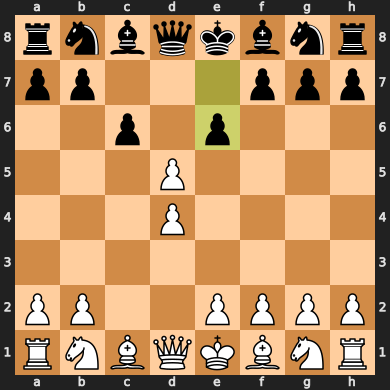

In [40]:
board = chess.Board()
for i in range(1,7):
    board.push_san(df2.iloc[0,i])
print(df2.iloc[0,0])
board

We only could get the first six moves because it splited in the data frame, if we want the final position of a game we can do something like this.

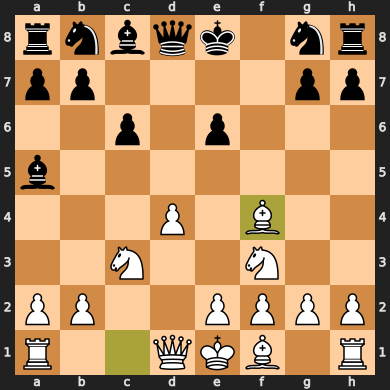

In [41]:
board = chess.Board()
all_move = df.loc[0,'moves'].split()
for i in all_move:
    board.push_san(i)
board

We can check if it is stillmate or checkmate by using is_stalemate() or is_checkmate()

In [42]:
board.is_stalemate()

False

In [43]:
board.is_checkmate()

False

Here I am going to define a function that takes in a board as input and output each side's total pieces value, a pawn is 1, knight and bishop are both 3, rook is 5, and queen is 9. This is the convention of each chess peice's value, some may argue that bishop is 3.5, but here we will just use 3. The approach I am going to take is to check every single square and use 

In [44]:
def board_value(board):
    white = 0
    black = 0
    for i in range(0,64):
        x = board.piece_type_at(i)
        if board.color_at(i) == True:
            if x == 1:
                white =+ 1
            elif x == 2 or x == 3:
                white =+ 3
            elif x == 4: 
                white =+ 5
            elif x == 5:
                white =+ 9
        else:
            if x == 1:
                black =+ 1
            elif x == 2 or x == 3:
                black =+ 3
            elif x == 4: 
                black =+ 5
            elif x == 5:
                black =+ 9
    return white, black

We will use this function to help us manipulate some raw data.

## Machine Learning Part 2

For this part of machine Learning I will be using the final board's value to predict the winner of the game with logsitic regression. But first, I will need to turn all the moves for each game into the final board position and use board_value to calculatethe valaue of it then the machine learning part will start.

In [45]:
def final_board(moves):
    board = chess.Board()
    all_move = moves.split()
    for i in all_move:
        board.push_san(i)
    return board

In [46]:
df3['board'] = final_board(df3.iloc[0,0])

I found something that was not expected, which is pandas DataFrame can actually store board in it. Thinking about it, it kind of makes snese, since board is an object and DataFrame can store all sorts of objects. 

So lets covert all the moves to become a board in df3 using final_board

In [47]:
df3['board'] = df3['moves'].map(final_board)

Instead of storing white's and black's value, I will store the difference postivie being white has more and negative being black has more.

In [48]:
df3['values'] = df3['board'].map(board_value)

In [49]:
df3['values'] = df3['values'].map(lambda x: x[0]- x[1])

In [50]:
df3

moves  white_win  \
0      d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...       True   
1      d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...      False   
2      e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...       True   
3      d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...       True   
4      e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...       True   
...                                                  ...        ...   
20053  d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...       True   
20054  d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...      False   
20055  d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...       True   
20056  e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...       True   
20057  d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...      False   

                                                   board  values  
0      r n b q k . n r\np p . . . . p p\n. . p . p . ...      -2  
1      r . b q k . n r\np p p p . . p p\n. . . . . . ...      -4  
2      . . . . . . . .\n. . . . . P . .\n. . P . . . ...       0  
3      . . . . . . . r\nR . . . . . Q p\n. . p . . . ...       4  
4      . . . . . . Q .\n. . . . . . . R\n. . . . . . ...       8  
...                                                  ...     ...  
20053  r n . q . k . r\np b p . b . . .\n. p . . p n ...      -2  
20054  . Q . . . . . .\n. . . . . N k .\n. p . . . . ...       8  
20055  r . b . q r . .\np . p n b k . Q\n. p . . p p ...       4  
20056  . . R . . . . .\n. Q . . . . . .\n. . . . . . ...       4  
20057  . . . K q . . .\n. . P . . k . .\n. . . . p . ...      -8  

[19676 rows x 4 columns]

In [51]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(df3[['values']], df3['white_win'], test_size=0.2, random_state=0)
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

Let's check the score on both train and test set.

In [52]:
clf.score(X_train, y_train)

0.6550190597204575

In [53]:
clf.score(X_test, y_test)


0.6557418699186992

We get about 15 wrong prediction every 100 prediction we make. So, the prediction is not great nor awful, but one thing we know is that it is definitly not over fitting. The train score and the test score have very similar performance. x

## Summary

First, we can see that some basic statistics of chess, such as which side wins more. We also found out that number of opening and total turns does not really correlate to ratings. At the end, we try to use the chess library's help to covert my raw data into some thing I will be intrest in, and eventually did logistic regression prediction the rating from final board's total value. After this, I understand that the most diffcult part of machine laerning, is not fitting nor predicting, sicne we can just use a library like sklearn, but the most challenging part is to turn raw data into something that can be use to do the machine learning process. 

## References

* What is the source of your dataset(s)?

From Kaggle: [Chess Dataset](https://www.kaggle.com/datasets/datasnaek/chess)

* Were any portions of the code or ideas taken from another source?  List those sources here and say how they were used.

Covering Unix to Datetime [stack over flow](https://stackoverflow.com/questions/19231871/convert-unix-time-to-readable-date-in-pandas-dataframe)

Interactive graph [course notes](https://christopherdavisuci.github.io/UCI-Math-10-S22/Week4/Week4-Wednesday.html)

Chess Library [documantation](https://python-chess.readthedocs.io/en/latest/)

* List other references that you found helpful.

Altari Graph [documantation](https://altair-viz.github.io/gallery/grouped_bar_chart.html)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=22e56718-5c04-4ec9-ad6a-6f39414b1aa9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>